In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

## 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

In [255]:
df = pd.read_csv('C:\\Users\\amvi\\Downloads\\cubic_zirconia.csv')

In [256]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [257]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


We can see from the above data that there is an unnamed column that provides indexing. Since Pandas itself provides the indexing of the data, the "unnamed" column is unnecessary. Therefore, we can drop that column.

In [258]:
df.tail()

,carat,cut,color,clarity,depth,table,x,y,z,price
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [259]:
df.shape
#There are 26967 rows and 10 columns

(26967, 10)

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


###### There are 6 float data type, 3 object data type and 1 int daa type (price which is our target data¶

In [261]:
#Geting unique counts of all Categorical  Variables
for column in df[['cut', 'color', 'clarity']]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




In [262]:
#Geting unique counts of all Continous  Variables
df[['carat' ,'depth', 'table', 'x', 'y', 'z',
       'price']].nunique()

carat     257
depth     169
table     112
x         531
y         526
z         356
price    8742
dtype: int64

In [263]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [264]:
df.isnull().values.any()

True

In [265]:
df[df.isin([0])].stack(0)

5821   x    0
       y    0
       z    0
6034   z    0
6215   x    0
       y    0
       z    0
10827  z    0
12498  z    0
12689  z    0
17506  x    0
       y    0
       z    0
18194  z    0
23758  z    0
dtype: object

In [266]:
# Percentage of missing values
100 * df.isnull().sum() / len(df)

carat      0.00000
cut        0.00000
color      0.00000
clarity    0.00000
depth      2.58464
table      0.00000
x          0.00000
y          0.00000
z          0.00000
price      0.00000
dtype: float64

###### Depth has 697 null values.

###### We can see that we have various missing values in respective columns. There are various ways of treating your missing values in the data set. And which technique to use when is actually dependent on the type of data you are dealing with.

Drop the missing values : In this case we drop the missing values from those variables. In case there are very few missing values you can drop those values.

Impute with mean value : For numerical column, you can replace the missing values with mean values. Before replacing with mean value, it is advisable to check that the variable shouldn't have extreme values .i.e. outliers.

Impute with median value : For numerical column, you can also replace the missing values with median values. In case you have extreme values such as outliers it is advisable to use median approach.

Impute with mode value : For categorical column, you can replace the missing values with mode values i.e the frequent ones.

In this exercise, as we  only have null values in 'DEPTH' which is a numerical columns so I will have proceeded  with median imputation process. 

In [267]:
median=df["depth"].median()
df["depth"].replace(np.nan,median,inplace=True)

In [268]:
# Check for missing value in 'depth' column
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

###### Now we do not have any missing or null value in 'depth'

In [269]:
#Lets check for duplicate values
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 34


,carat,cut,color,clarity,depth,table,x,y,z,price
4756,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.00,2130
8144,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
8919,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
9818,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906
10473,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
10500,1.00,Premium,F,VVS2,60.6,54.0,6.56,6.52,3.96,8924
12894,1.21,Premium,D,SI2,62.5,57.0,6.79,6.71,4.22,6505
13547,0.43,Ideal,G,VS1,61.9,55.0,4.84,4.86,3.00,943
13783,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898


###### Since we have 34 duplicate records in the data, we will remove this from the data set so that we get only distinct records.

In [270]:
df.drop_duplicates(inplace=True) 

In [271]:
#Post removing the duplicate, we will check whether the duplicates has been removed from the data set or not.
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,carat,cut,color,clarity,depth,table,x,y,z,price


In [272]:
df.shape

(26933, 10)

###### Now, we can clearly see that there are no duplicate records in the data set. We can also quickly confirm the number of records by using the shape attribute as those 34 records should be removed from the original data. Initially it had 26967 records now it is having 26933 records.

In [273]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
carat,26933.0,0.80,0.48,0.2,0.40,0.70,1.05,4.50
depth,26933.0,61.75,1.39,50.8,61.10,61.80,62.50,73.60
table,26933.0,57.46,2.23,49.0,56.00,57.00,59.00,79.00
x,26933.0,5.73,1.13,0.0,4.71,5.69,6.55,10.23
y,26933.0,5.73,1.17,0.0,4.71,5.70,6.54,58.90
z,26933.0,3.54,0.72,0.0,2.90,3.52,4.04,31.80
price,26933.0,3937.53,4022.55,326.0,945.00,2375.00,5356.00,18818.00


In [274]:
df.describe(include='object').T

,count,unique,top,freq
cut,26933,5,Ideal,10805
color,26933,7,G,5653
clarity,26933,8,SI1,6565


# Univariate Analysis

Text(0.5, 1.0, 'x Distribution')

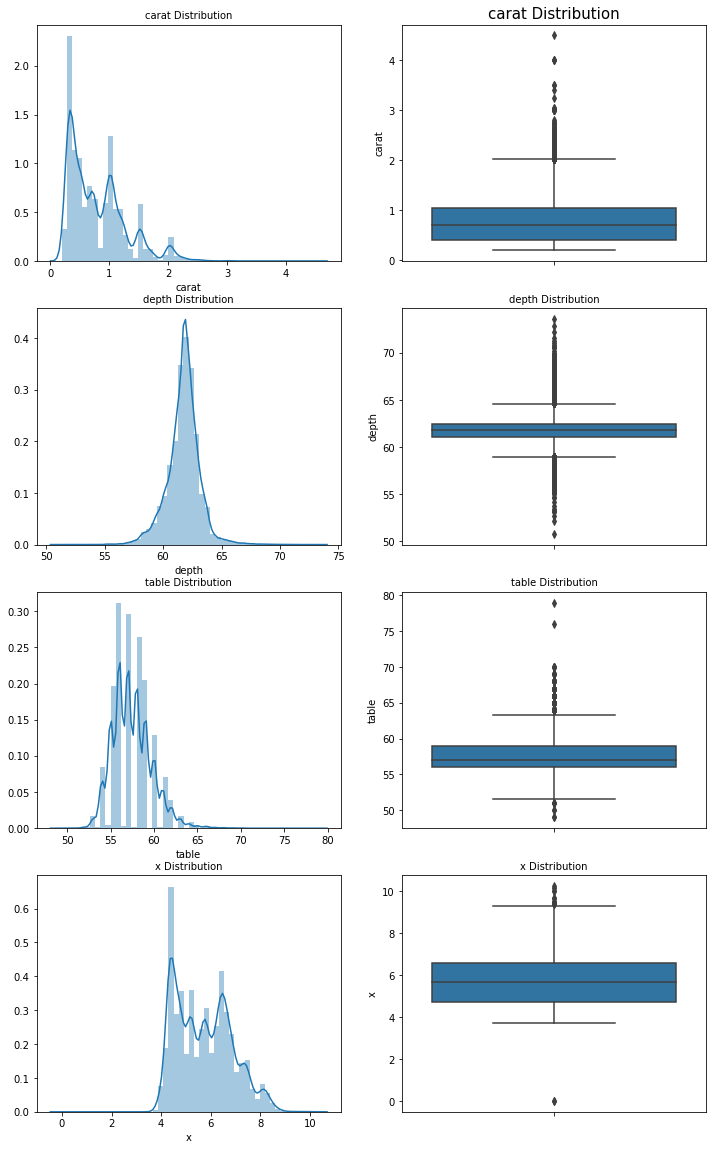

In [275]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 20)
a = sns.distplot(df['carat'] , ax=axes[0][0])
a.set_title("carat Distribution",fontsize=10)
a = sns.boxplot(df['carat'] , orient = "v" , ax=axes[0][1])
a.set_title("carat Distribution",fontsize=15)

a = sns.distplot(df['depth'] , ax=axes[1][0])
a.set_title("depth Distribution",fontsize=10)

a = sns.boxplot(df['depth'] , orient = "v" , ax=axes[1][1])
a.set_title("depth Distribution",fontsize=10)

a = sns.distplot(df['table'] , ax=axes[2][0])
a.set_title("table Distribution",fontsize=10)

a = sns.boxplot(df['table'] , orient = "v" , ax=axes[2][1])
a.set_title("table Distribution",fontsize=10)

a = sns.distplot(df['x'] , ax=axes[3][0])
a.set_title("x Distribution",fontsize=10)

a = sns.boxplot(df['x'] , orient = "v" , ax=axes[3][1])
a.set_title("x Distribution",fontsize=10)

Text(0.5, 1.0, 'price Distribution')

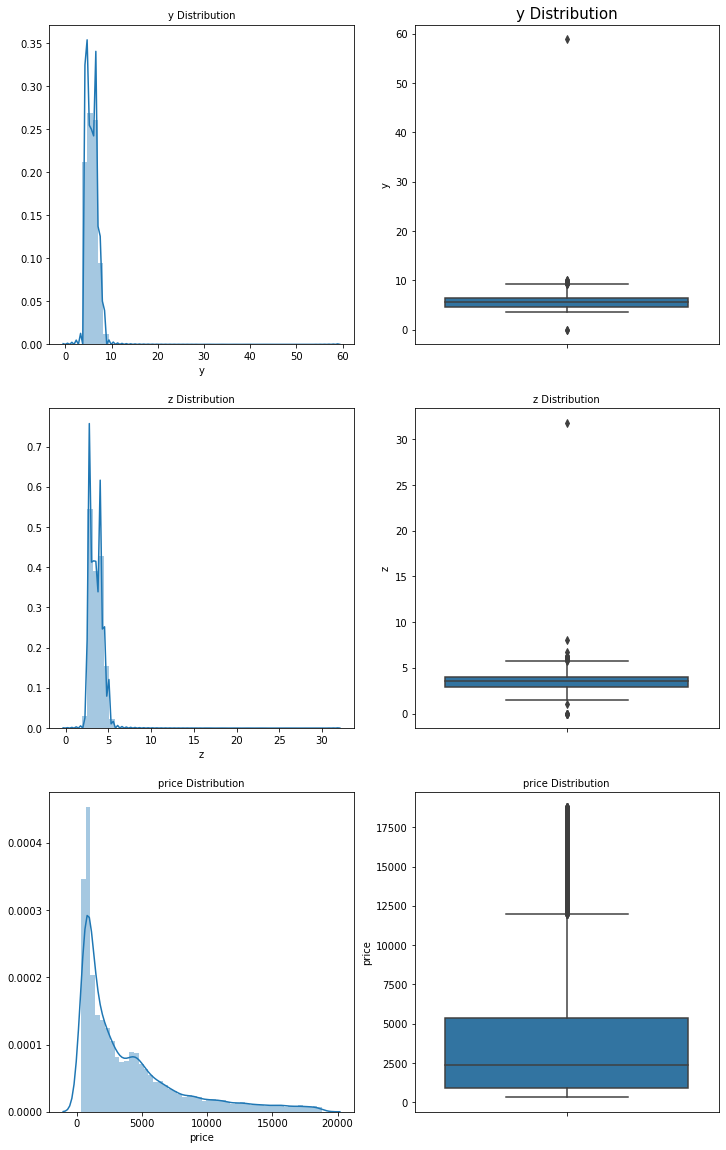

In [276]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(12, 20)
a = sns.distplot(df['y'] , ax=axes[0][0])
a.set_title("y Distribution",fontsize=10)
a = sns.boxplot(df['y'] , orient = "v" , ax=axes[0][1])
a.set_title("y Distribution",fontsize=15)

a = sns.distplot(df['z'] , ax=axes[1][0])
a.set_title("z Distribution",fontsize=10)

a = sns.boxplot(df['z'] , orient = "v" , ax=axes[1][1])
a.set_title("z Distribution",fontsize=10)

a = sns.distplot(df['price'] , ax=axes[2][0])
a.set_title("price Distribution",fontsize=10)

a = sns.boxplot(df['price'] , orient = "v" , ax=axes[2][1])
a.set_title("price Distribution",fontsize=10)

In [277]:
df.skew()

carat    1.114789
depth   -0.029475
table    0.765805
x        0.392290
y        3.867764
z        2.580665
price    1.619116
dtype: float64

In [278]:
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='object')].index

In [279]:
#lets treat the outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [280]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

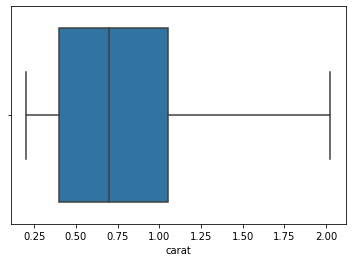

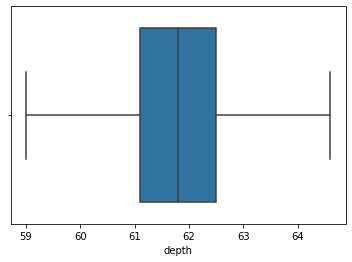

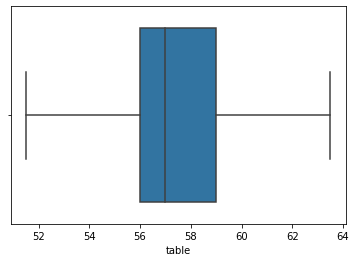

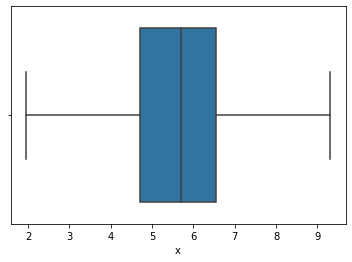

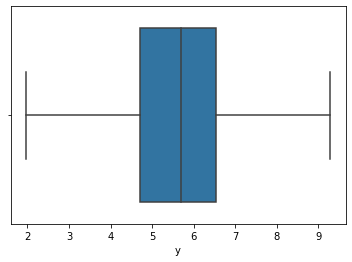

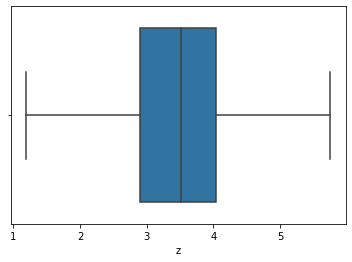

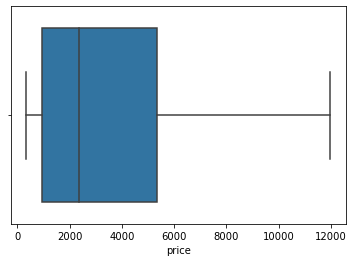

In [281]:
cols = ['carat' ,'depth', 'table', 'x', 'y', 'z',
       'price']

for i in cols:
    sns.boxplot(df[i])
    plt.show()

Text(0.5, 0, 'Price')

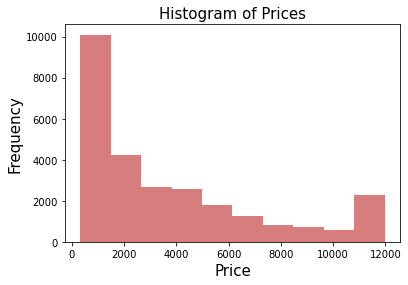

In [282]:
%matplotlib inline
plt.figure()
plt.hist(x = "price", data = df, color = "indianred", alpha = 0.8)
plt.title("Histogram of Prices", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.xlabel("Price", fontsize = 15)

From the above  it appears(as one might expect), the distribution of prices is skewed to the right ie as the prices increase, the number of diamonds decrease. We can verify this by using a skewness test.

In [283]:
df ['price'].skew()

1.1576875566086413

###### From the above value we could see that , our skew is a positive value(greater than 1) indicating a positive skewness which means that our mean is greater than the median.

# Categorical Variables
Cut,Colour and Clarity

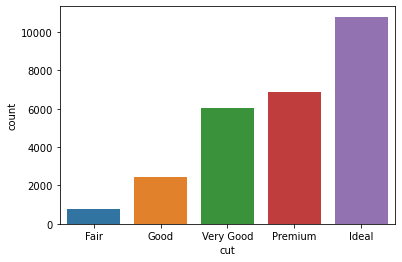

In [284]:
#Lets visualise catgorical data
sns.countplot(df['cut'], order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])


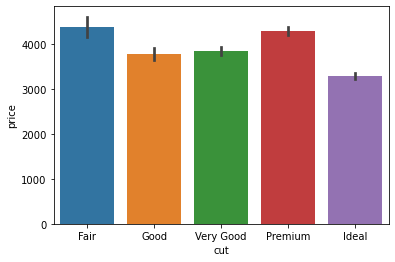

In [285]:
sns.barplot(data = df, x='cut',y='price',order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])

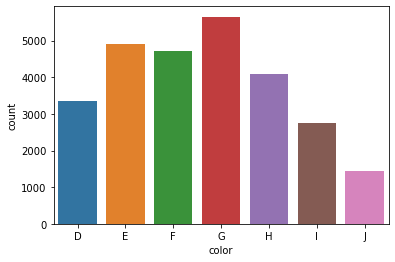

In [286]:
sns.countplot(df['color'] ,order = ['D', 'E', 'F', 'G','H', 'I', 'J'])

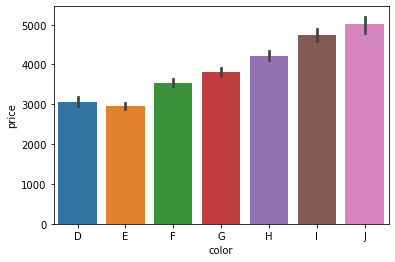

In [287]:
sns.barplot(data = df, x='color',y='price',order = ['D', 'E', 'F', 'G','H', 'I', 'J'] )

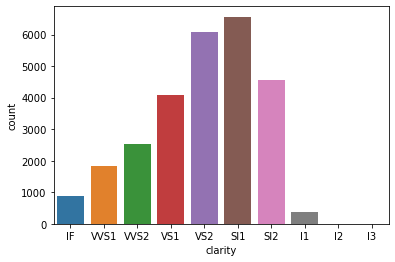

In [288]:
sns.countplot(df['clarity'], order = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3'])

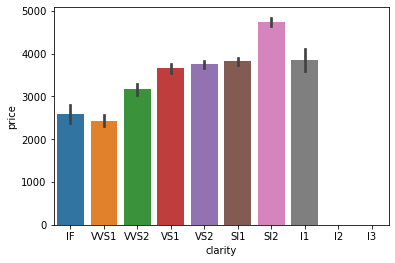

In [289]:
sns.barplot(data = df, x='clarity',y='price', order =['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3'])

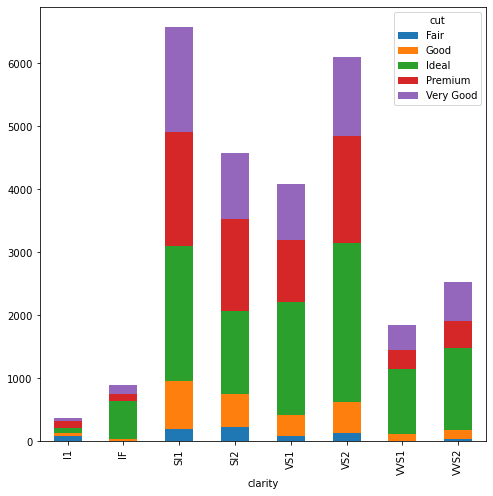

In [290]:
clarity_cut_table = pd.crosstab(index=df["clarity"], columns=df["cut"])

clarity_cut_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

###### We can see that from above that most of the people prefer to buy diamond of SI1 clarity followed by VS2, SI2, and VS1.In that, the cut they prefer is Ideal, Premium, and very good's diamond cut category. Moreover, we can infer that people are not taking the highest clarity diamonds, such as IF or VVS1 and others and are ready to sacrifice on clarity but are more focusing on the cut of the diamonds.

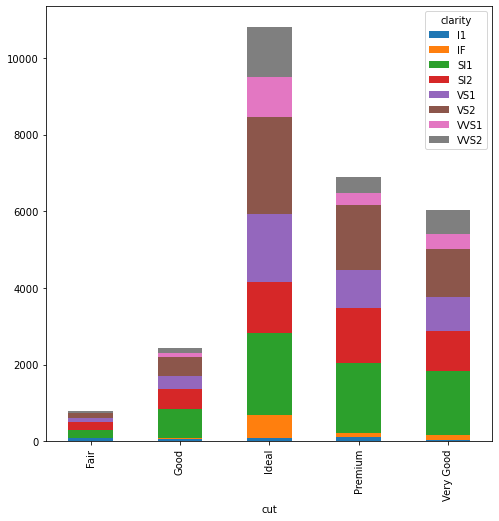

In [291]:
#Let us figure it out by plotting the cut vs. clarity.
cut_clarity_table = pd.crosstab(index=df["cut"], columns=df["clarity"])

cut_clarity_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

###### We can see that people prefer Ideal cut over any other cut diamonds followed by Premium and Very Good. It suggests that people are focusing on cut than clarity.

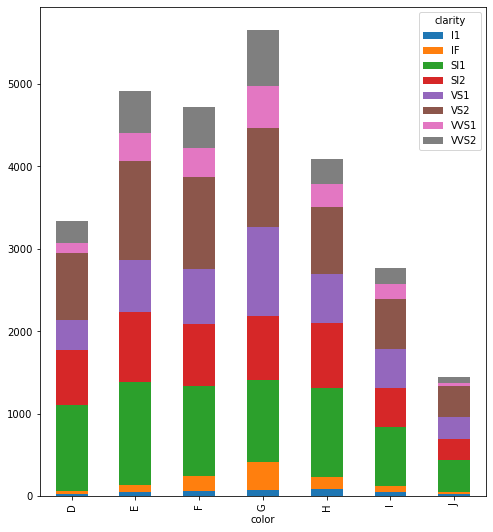

In [292]:
#Color Vs Clarity
color_clarity_table = pd.crosstab(index=df["color"], columns=df["clarity"])

color_clarity_table.plot(kind="bar", 
                 figsize=(8,9),
                 stacked=True)

We can see that from above that most of the people prefer G color followed by E, F, and H.In that the clarity they mostly prefer SI1 followed by VS1,VS2 and  SI2 category.



# MULTIVARIATE ANALYSIS

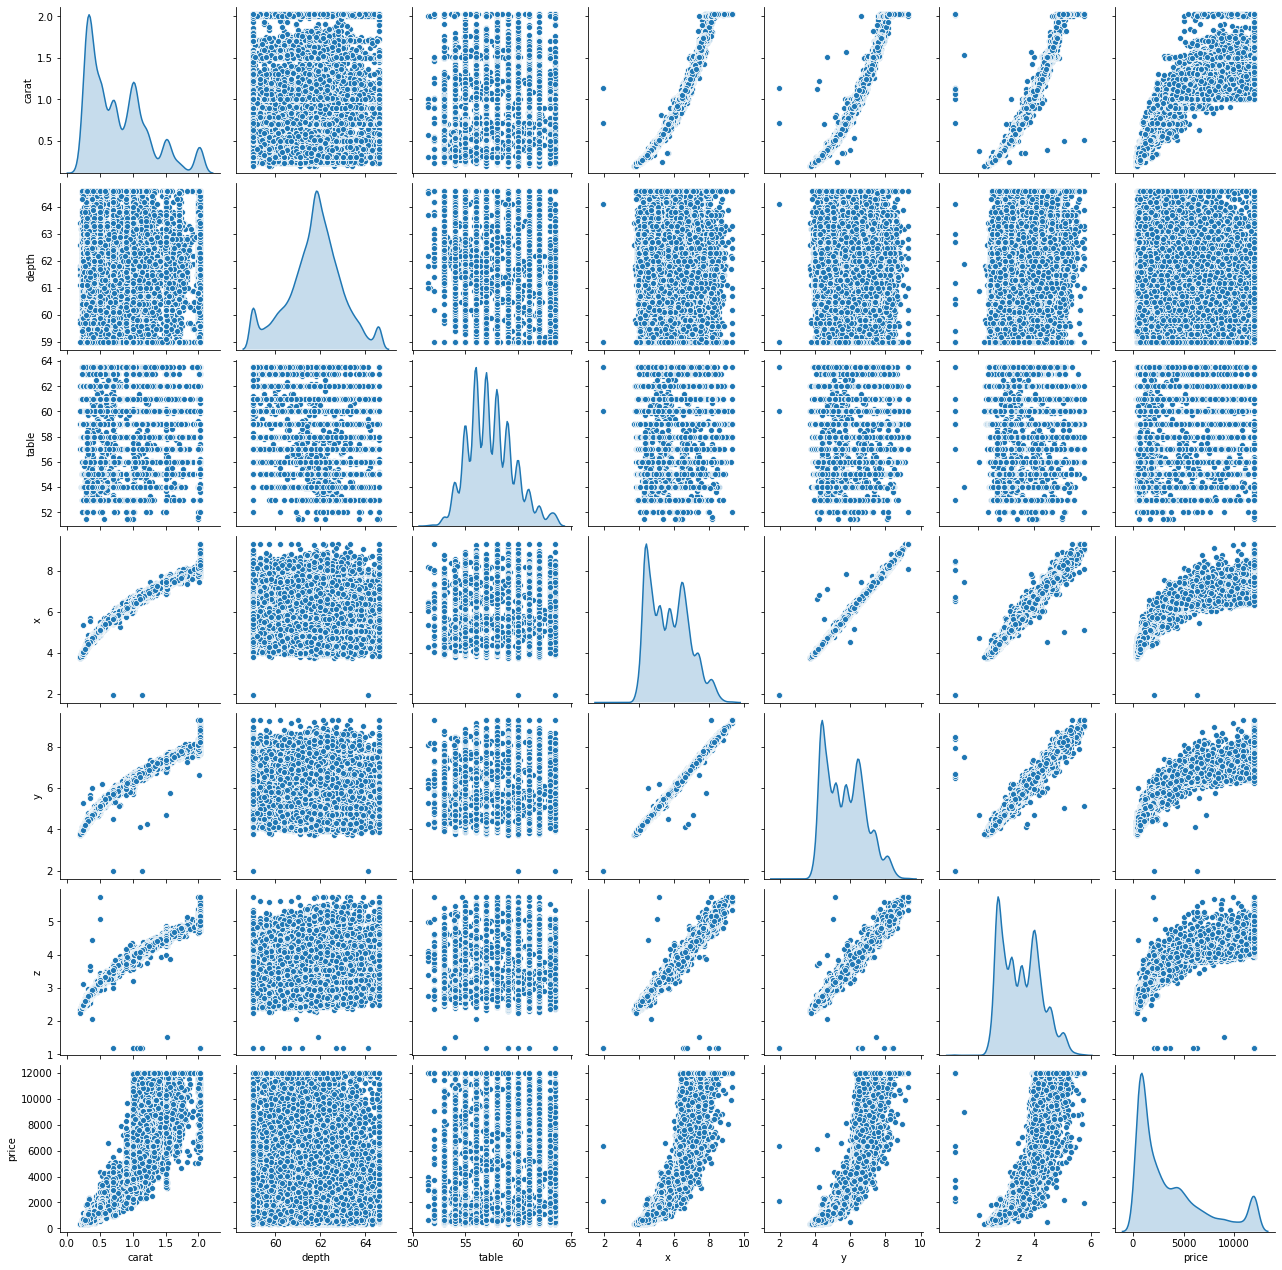

In [293]:
sns.pairplot(df, diag_kind='kde')  
plt.show()

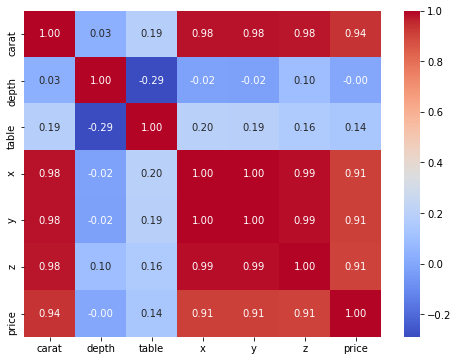

In [294]:
df_cor = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(df_cor, annot=True, fmt = '.2f', cmap='coolwarm')

In [295]:
corelate = df.corr().abs() 
stack = corelate.unstack() 
sorting = stack.sort_values(ascending=False)
sorting=sorting[(sorting<1) & (sorting>0.3)].drop_duplicates().to_frame() 
sorting.columns = ['correlation']
sorting

correlation
x     y         0.998491
z     x         0.988168
y     z         0.987841
carat x         0.982387
      y         0.981464
z     carat     0.977508
price carat     0.936762
      y         0.914361
      x         0.912933
      z         0.905866

In [296]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [182]:
def calc_vif(dataset):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["features"] = dataset.columns
    vif["VIF"] = [variance_inflation_factor(dataset.values, i) for i in range(dataset.shape[1])]
    return(vif)

In [183]:
calc_vif(df[['carat','depth', 'table', 'x', 'y', 'z']])

,features,VIF
0,carat,108.968102
1,depth,808.573775
2,table,646.424237
3,x,9982.947474
4,y,9190.650984
5,z,1760.719555


In [184]:
calc_vif(df[['carat','depth', 'table', 'z']])

,features,VIF
0,carat,97.936312
1,depth,751.323796
2,table,461.073525
3,z,668.468684


In [185]:
calc_vif(df[['carat','depth']])

,features,VIF
0,carat,3.95025
1,depth,3.95025


In [186]:
calc_vif(df[['carat' ,'table']])

,features,VIF
0,carat,4.027436
1,table,4.027436


In [187]:
df.corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.029433,0.187143,0.982387,0.981464,0.977508,0.936762
depth,0.029433,1.000000,-0.289357,-0.019848,-0.022884,0.095253,-0.001060
table,0.187143,-0.289357,1.000000,0.199061,0.193428,0.159380,0.137880
x,0.982387,-0.019848,0.199061,1.000000,0.998491,0.988168,0.912933
y,0.981464,-0.022884,0.193428,0.998491,1.000000,0.987841,0.914361
z,0.977508,0.095253,0.159380,0.988168,0.987841,1.000000,0.905866
price,0.936762,-0.001060,0.137880,0.912933,0.914361,0.905866,1.000000


## 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

In [188]:
#Lets check for null values in our dataset .Above in EDA I have alreday done null analyses for 'depth' variable lets see for other variable.
df.describe()


,carat,depth,table,x,y,z,price
count,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
mean,0.793298,61.750462,57.435544,5.729323,5.731255,3.536928,3735.832213
std,0.462127,1.218530,2.157119,1.126175,1.118155,0.696753,3468.207359
min,0.200000,59.000000,51.500000,1.950000,1.965000,1.190000,326.000000
25%,0.400000,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000
max,2.025000,64.600000,63.500000,9.310000,9.285000,5.750000,11972.500000


In [297]:
df.loc[((df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0))]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [298]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

###### So we could see that except depth no other null values were present in any variables.

In the dataframe we could see the x,y,z column which indicates  Length of the cubic zirconia in mm.,Width of the cubic zirconia in mm.and Height of the cubic zirconia in mm.X,Y,Z appears to be vague as  one may not  suddenly know what it stands for and is not  clear and are misguiding . Therefore, we could  rename the columns as lenght,width and height.

So I can modify my columns name for better understanding.


In [299]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779.0


In [300]:
df.rename(columns = {'x': 'length', 'y': 'width', 'z': 'height'}, inplace = True)


In [301]:
df.head()

,carat,cut,color,clarity,depth,table,length,width,height,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779.0


In [302]:
#now i am Converting each Ordinal Categorical columns to numeric
df['cut'].replace({'Good':3, 
                          'Very Good':2,
                          'Fair':1,
                          'Ideal':5,
                          'Premium':4
                         }, inplace=True)

In [303]:
df['color'].replace({'J':7, 
                          'I':6,
                          'H':5,
                          'G':4,
                          'F':3,
                          'E':2,
                          'D':1
                         }, inplace=True)

In [304]:
df['clarity'].replace({'I1':8,
                          'SI1':7,
                          'SI2':6,
                          'VS1':4,
                          'VS2':5,
                          'VVS1':2,
                          'VVS2':3,
                          'IF':1
                         }, inplace=True)


In [305]:
df.head()

,carat,cut,color,clarity,depth,table,length,width,height,price
0,0.30,5,2,7,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,4,4,1,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,2,2,3,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,5,3,4,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,5,3,2,60.4,59.0,4.35,4.43,2.65,779.0


###### 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.


In [306]:
for feature in df.columns: 
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature]).codes


In [307]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  int64  
 2   color    26933 non-null  int64  
 3   clarity  26933 non-null  int64  
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   length   26933 non-null  float64
 7   width    26933 non-null  float64
 8   height   26933 non-null  float64
 9   price    26933 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 2.3 MB


In [308]:
# Copy all the predictor variables into X dataframe
X = df.drop('price', axis=1)

# Copy target into the y dataframe. 
y = df[['price']]

In [309]:
X


,carat,cut,color,clarity,depth,table,length,width,height
0,0.30,5,2,7,62.1,58.0,4.27,4.29,2.66
1,0.33,4,4,1,60.8,58.0,4.42,4.46,2.70
2,0.90,2,2,3,62.2,60.0,6.04,6.12,3.78
3,0.42,5,3,4,61.6,56.0,4.82,4.80,2.96
4,0.31,5,3,2,60.4,59.0,4.35,4.43,2.65
...,...,...,...,...,...,...,...,...,...
26962,1.11,4,4,7,62.3,58.0,6.61,6.52,4.09
26963,0.33,5,5,1,61.9,55.0,4.44,4.42,2.74
26964,0.51,4,2,5,61.7,58.0,5.12,5.15,3.17
26965,0.27,2,3,3,61.8,56.0,4.19,4.20,2.60


In [310]:
X.shape

(26933, 9)

In [311]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

### Linear Regression-

In [312]:
# invoke the LinearRegression function and find the bestfit model on training data


regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [313]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 8851.043578385741
The coefficient for cut is 78.12309833928586
The coefficient for color is -262.94598177748526
The coefficient for clarity is -351.71566303411106
The coefficient for depth is -28.411014715524118
The coefficient for table is -28.2411051020196
The coefficient for length is -1820.218395908638
The coefficient for width is 1583.3211661842515
The coefficient for height is -328.0822306964129


In [61]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 5028.30032407703


In [62]:
# R square on training data
regression_model.score(X_train, y_train)

0.9205774490301728

In [63]:
# R square on testing data
regression_model.score(X_test, y_test)

0.9216634433853348

In [64]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

976.6853506548496

In [65]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

972.3231690793775

In [69]:
#Using Statsmodel library to get R type outputs 
# R^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no 
# influence on the predicted variable. Instead we use adjusted R^2 which removes the statistical chance that improves R^2
# Scikit does not provide a facility for adjusted R^2... so we use 
# statsmodel, a library that gives results similar to
# what you obtain in R language
# This library expects the X and Y to be given in one single dataframe

data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,length,width,height,price
22114,0.34,2,5,5,62.4,60.0,4.41,4.44,2.76,537.0
2275,0.30,5,2,5,61.2,55.0,4.35,4.31,2.65,844.0
19183,0.50,5,4,7,62.5,57.0,5.09,5.05,3.17,1240.0
5030,1.10,3,2,6,63.3,56.0,6.53,6.58,4.15,4065.0
25414,1.02,4,3,6,61.1,62.0,6.54,6.49,3.98,4057.0


In [70]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+length+width+height', data = data_train).fit()
lm1.params

Intercept    5028.300324
carat        8851.043578
cut            78.123098
color        -262.945982
clarity      -351.715663
depth         -28.411015
table         -28.241105
length      -1820.218396
width        1583.321166
height       -328.082231
dtype: float64

In [71]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                 2.427e+04
Date:                Sat, 30 Oct 2021   Prob (F-statistic):               0.00
Time:                        08:44:30   Log-Likelihood:            -1.5654e+05
No. Observations:               18853   AIC:                         3.131e+05
Df Residuals:                   18843   BIC:                         3.132e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5028.3003    725.172      6.934      0.0

In [315]:
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases

mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [316]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual values.

import math

math.sqrt(mse)

972.3231690793758

In [317]:
# so there is avg of 9.7 (roundoff) mpg difference from real mpg on an avg

In [318]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test, y_test)

0.9216634433853348

In [319]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

Text(0.5, 1.0, 'Actual vs Predicted - Notscaled')

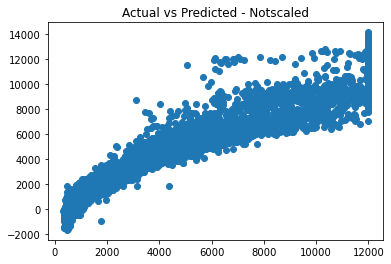

In [320]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
#plt.rcParams['figure.dpi'] = 500



plt.scatter(y_test['price'], y_pred)
plt.title('Actual vs Predicted - Notscaled')

In [331]:
#ITERATION 2
# How do we improve the model? the R^2 is .921, how do we improve it
# The indpendent attributes have different units and scales of measurement 
# It is always a good practice to scale all the dimensions using z scores or someother methode to address the problem of different scales 

from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [332]:
 #invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [333]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.1751178250954355
The coefficient for cut is 0.02841852377717538
The coefficient for color is -0.12926461781534793
The coefficient for clarity is -0.17397941984122503
The coefficient for depth is -0.009921728368324573
The coefficient for table is -0.01754958056218623
The coefficient for length is -0.5893687315843792
The coefficient for width is 0.5091148235005615
The coefficient for height is -0.06572742964032521


In [334]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1.9111347093590655e-16


In [335]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test_scaled, y_test_scaled)

0.9216619580771904

In [336]:
# Let us check the sum of squared errors by predicting value of y for training cases and 
# subtracting from the actual y for the training cases

mse = np.mean((regression_model.predict(X_test_scaled)-y_test_scaled)**2)

In [337]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

0.2798893387087284

In [338]:
# predict price for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test_scaled)

Text(0.5, 1.0, 'Actual vs Predicted - After_Scaled')

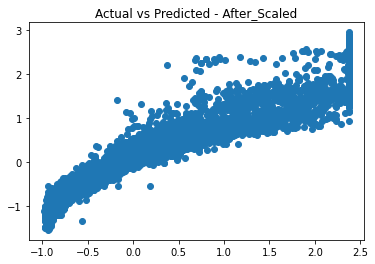

In [339]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
plt.scatter(y_test_scaled['price'], y_pred)
plt.title('Actual vs Predicted - After_Scaled')

#### Checking for other models-

In [201]:
for feature in df.columns: 
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature]).codes


In [202]:
df.dtypes

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
length     float64
width      float64
height     float64
price      float64
dtype: object

In [203]:
#Splitting the data

x=df.drop(['price'],axis=1) 
y=df.price

In [204]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=123,test_size=0.30)

In [208]:
ss=StandardScaler() 
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.transform(x_test)

##### We are building 4 models using ANN, Decision Tree, Random Forest, and Linear Regression to see which models gives us the best results.

In [248]:
annr = MLPRegressor(hidden_layer_sizes=(500),random_state=123, max_iter=1000)#you are free to tweak the layer sizes
rfr = RandomForestRegressor(random_state=123)
dtr = tree.DecisionTreeRegressor(random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:  # we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
    
    if (i != annr) :
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
 
    else :
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

                         Train RMSE   Test RMSE  Training Score  Test Score
Linear Regression        972.613391  981.989026        0.921669    0.919064
Decision Tree Regressor    4.747410  550.247474        0.999998    0.974588
Random Forest Regressor  147.912566  392.150615        0.998188    0.987093
ANN Regressor            566.719887  584.383642        0.973406    0.971337


### 1.4 Inference: Basis on these predictions, what are the business insights and recommendations. Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

In [249]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [250]:
calc_vif(df)

,features,VIF
0,carat,178.230409
1,cut,11.886110
2,color,7.214764
3,clarity,14.847496
4,depth,937.381639
5,table,735.107255
6,length,10530.770276
7,width,9391.812678
8,height,1933.163849
9,price,27.254302


In [251]:
calc_vif(df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'length', 'width',
       'height']])

,features,VIF
0,carat,112.784265
1,cut,11.746532
2,color,6.093439
3,clarity,11.212778
4,depth,933.183604
5,table,734.511637
6,length,10427.966752
7,width,9274.618321
8,height,1925.527159


In [252]:
calc_vif(df[['carat', 'cut', 'color', 'clarity','table']])

,features,VIF
0,carat,4.859692
1,cut,9.201788
2,color,6.020427
3,clarity,10.826354
4,table,24.745551


1.4 Inference: Basis on these predictions, what are the business insights and recommendations.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

### Problem 2: Logistic Regression and LDA-You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

###### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [344]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [345]:
df_HP = pd.read_csv('C:\\Users\\amvi\\Downloads\\Holiday_Package.csv')

In [346]:
df_HP

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no
...,...,...,...,...,...,...,...,...
867,868,no,40030,24,4,2,1,yes
868,869,yes,32137,48,8,0,0,yes
869,870,no,25178,24,6,2,0,yes
870,871,yes,55958,41,10,0,1,yes


In [347]:
df_HP.drop('Unnamed: 0', axis = 1, inplace = True)
df_HP.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [348]:
df_HP.shape

(872, 7)

In [349]:
df_HP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [350]:
#Geting unique counts of all Categorical  Variables
for column in df_HP[['Holliday_Package', 'foreign']]:
    print(column.upper(),': ',df_HP[column].nunique())
    print(df_HP[column].value_counts().sort_values())
    print('\n')

HOLLIDAY_PACKAGE :  2
yes    401
no     471
Name: Holliday_Package, dtype: int64


FOREIGN :  2
yes    216
no     656
Name: foreign, dtype: int64




In [351]:
df_HP.Holliday_Package.value_counts(1)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

In [352]:
# Let us check whether any of the columns has any value other than numeric i.e. data is not corrupted such as a "?" instead of 
# a number.

# we use np.isreal a numpy function which checks each column for each row and returns a bool array, 
# where True if input element is real.
# applymap is pandas dataframe function that applies the np.isreal function columnwise
# Following line selects those rows which have some non-numeric value in any of the columns hence the  ~ symbol

df_HP[~df_HP.applymap(np.isreal).all(1)]

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no
...,...,...,...,...,...,...,...
867,no,40030,24,4,2,1,yes
868,yes,32137,48,8,0,0,yes
869,no,25178,24,6,2,0,yes
870,yes,55958,41,10,0,1,yes


In [353]:
df_HP.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [354]:
df_HP.isnull().values.any()

False

In [355]:
#Lets check for duplicate values
dups = df_HP.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df_HP[dups]

Number of duplicate rows = 0


,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign


In [356]:
df_HP.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Salary,872.0,47729.17,23418.67,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,39.96,10.55,20.0,32.0,39.0,48.0,62.0
educ,872.0,9.31,3.04,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,0.31,0.61,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,0.98,1.09,0.0,0.0,1.0,2.0,6.0


### Univariate / Bivariate analysis

Text(0.5, 1.0, 'no_older_children Distribution')

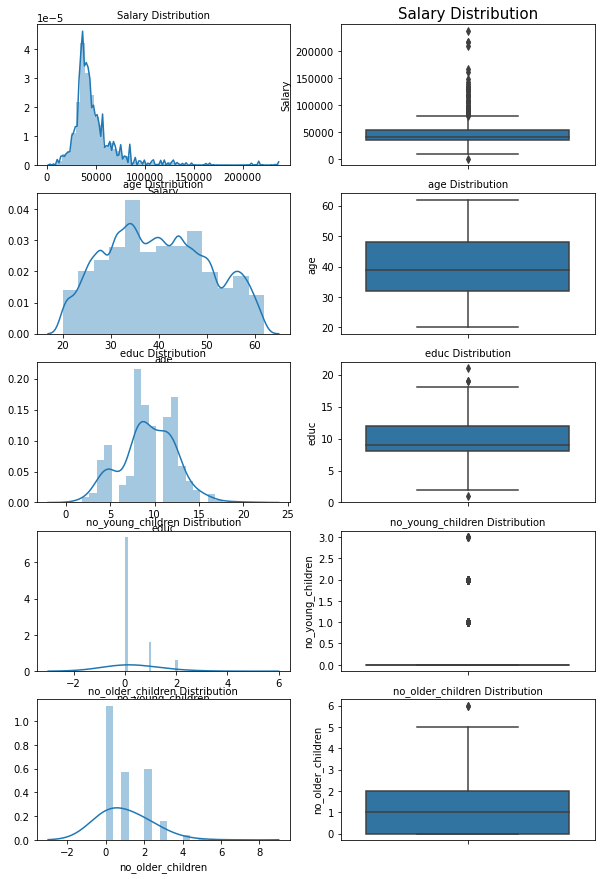

In [357]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(10,15)

a = sns.distplot(df_HP['Salary'], kde_kws = {'bw' : 1}, ax=axes[0][0])
a.set_title("Salary Distribution",fontsize=10)

a = sns.boxplot(df_HP['Salary'] , orient = "v" , ax=axes[0][1])
a.set_title("Salary Distribution",fontsize=15)

a = sns.distplot(df_HP['age'], kde_kws = {'bw' : 1}, ax=axes[1][0])
a.set_title("age Distribution",fontsize=10)

a = sns.boxplot(df_HP['age'] , orient = "v" , ax=axes[1][1])
a.set_title("age Distribution",fontsize=10)

a = sns.distplot(df_HP['educ'],  kde_kws = {'bw' : 1}, ax=axes[2][0])
a.set_title("educ Distribution",fontsize=10)

a = sns.boxplot(df_HP['educ'] , orient = "v" , ax=axes[2][1])
a.set_title("educ Distribution",fontsize=10)

a = sns.distplot(df_HP['no_young_children'],  kde_kws = {'bw' : 1}, ax=axes[3][0])
a.set_title("no_young_children Distribution",fontsize=10)

a = sns.boxplot(df_HP['no_young_children'] , orient = "v" , ax=axes[3][1])
a.set_title("no_young_children Distribution",fontsize=10)

a = sns.distplot(df_HP['no_older_children'], kde_kws = {'bw' : 1}, ax=axes[4][0])
a.set_title("no_older_children Distribution",fontsize=10)

a = sns.boxplot(df_HP['no_older_children'] , orient = "v" , ax=axes[4][1])
a.set_title("no_older_children Distribution",fontsize=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002289E9D5588>,
      dtype=object)

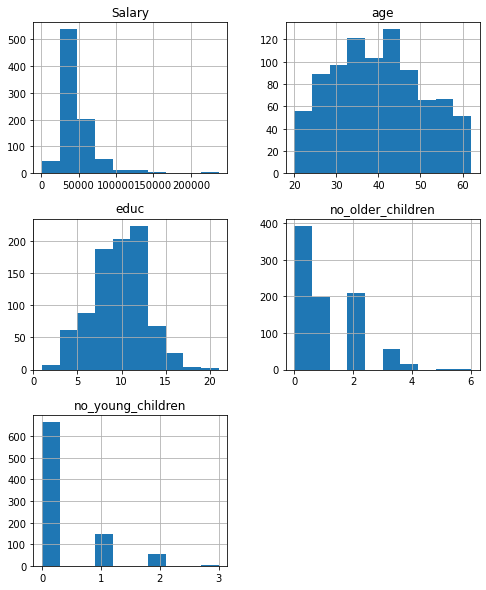

In [358]:
df_HP.hist(figsize=(8,10))

In [359]:
df_HP.skew()

Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64

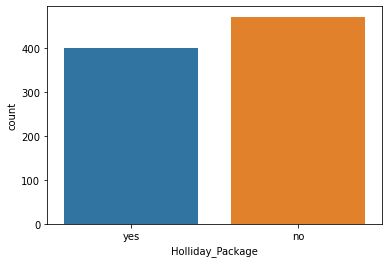

In [360]:
sns.countplot(df_HP['Holliday_Package'], order = ['yes', 'no'])

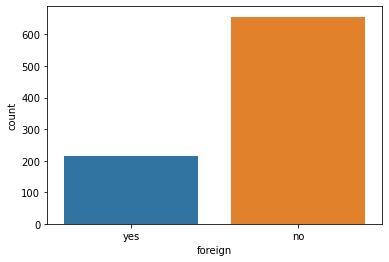

In [361]:
sns.countplot(df_HP['foreign'], order = ['yes', 'no'])

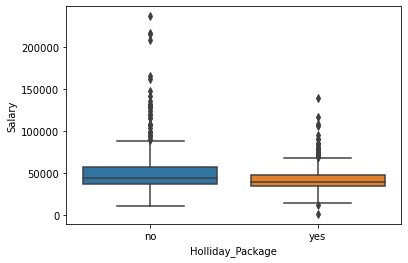

In [362]:
# Bivarate analysis with target variables.


sns.boxplot(data = df_HP, x='Holliday_Package',y='Salary')

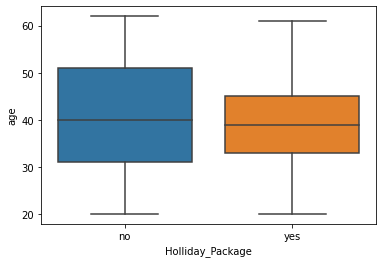

In [363]:
sns.boxplot(data = df_HP, x='Holliday_Package',y='age')

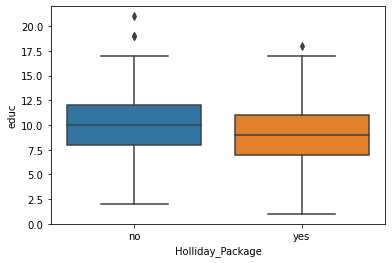

In [364]:
sns.boxplot(data = df_HP, x='Holliday_Package',y='educ')

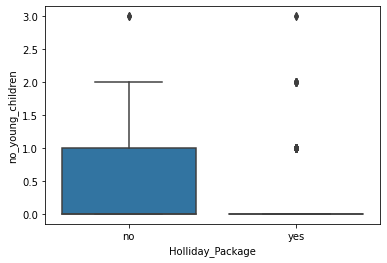

In [365]:
sns.boxplot(data = df_HP, x='Holliday_Package',y='no_young_children')

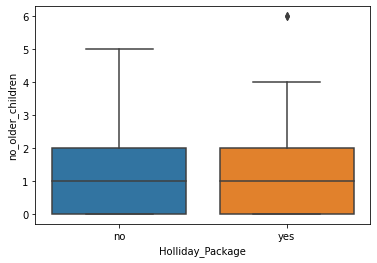

In [366]:
sns.boxplot(data = df_HP, x='Holliday_Package',y='no_older_children')

In [367]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range  

In [368]:
lrSalary,urSalary=remove_outlier(df_HP['Salary'])
df_HP['Salary']=np.where(df_HP['Salary']>urSalary,urSalary,df_HP['Salary'])
df_HP['Salary']=np.where(df_HP['Salary']<lrSalary,lrSalary,df_HP['Salary'])

lreduc,ureduc=remove_outlier(df_HP['educ'])
df_HP['educ']=np.where(df_HP['educ']>ureduc,ureduc,df_HP['educ'])
df_HP['educ']=np.where(df_HP['educ']<lreduc,lreduc,df_HP['educ'])

lrno_young_children,urno_young_children=remove_outlier(df_HP['no_young_children'])
df_HP['no_young_children']=np.where(df_HP['no_young_children']>urno_young_children,urno_young_children,df_HP['no_young_children'])
df_HP['no_young_children']=np.where(df_HP['no_young_children']<lrno_young_children,lrno_young_children,df_HP['no_young_children'])



lrno_older_children,urno_older_children=remove_outlier(df_HP['no_older_children'])
df_HP['no_older_children']=np.where(df_HP['no_older_children']>urno_older_children,urno_older_children,df_HP['no_older_children'])
df_HP['no_older_children']=np.where(df_HP['no_older_children']<lrno_older_children,lrno_older_children,df_HP['no_older_children'])



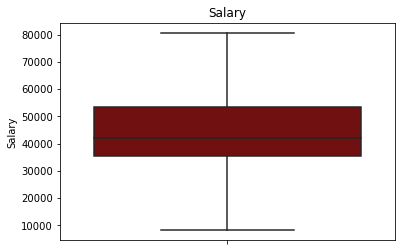

In [369]:
plt.title('Salary')
sns.boxplot(df_HP['Salary'],orient='vertical',color='maroon')

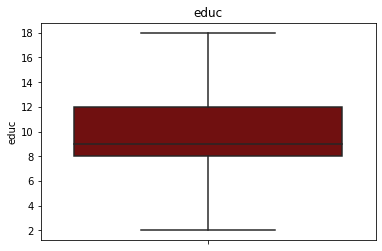

In [370]:
plt.title('educ')
sns.boxplot(df_HP['educ'],orient='vertical',color='maroon')

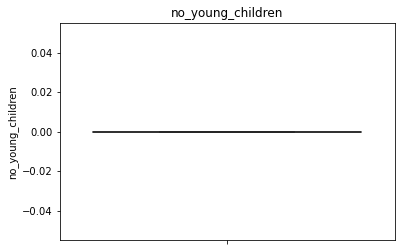

In [371]:
plt.title('no_young_children')
sns.boxplot(df_HP['no_young_children'],orient='vertical',color='maroon')

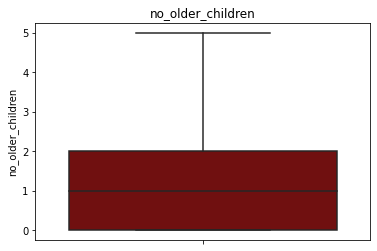

In [372]:
plt.title('no_older_children')
sns.boxplot(df_HP['no_older_children'],orient='vertical',color='maroon')

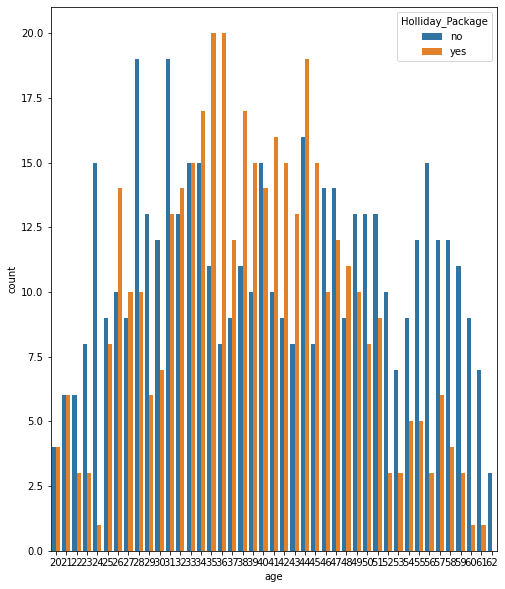

In [373]:
plt.figure(figsize=(8,10))
sns.countplot(x="age", hue="Holliday_Package", data=df_HP)


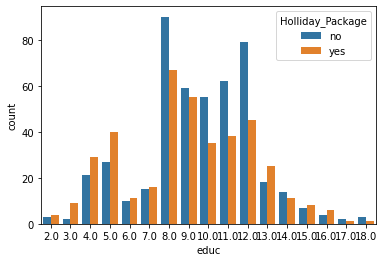

In [374]:
sns.countplot(x="educ", hue="Holliday_Package", data=df_HP)

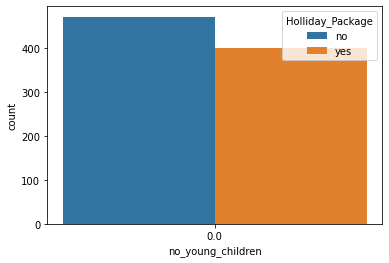

In [375]:
sns.countplot(x="no_young_children", hue="Holliday_Package", data=df_HP)

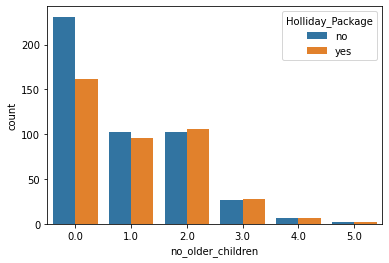

In [376]:
sns.countplot(x="no_older_children", hue="Holliday_Package", data=df_HP)

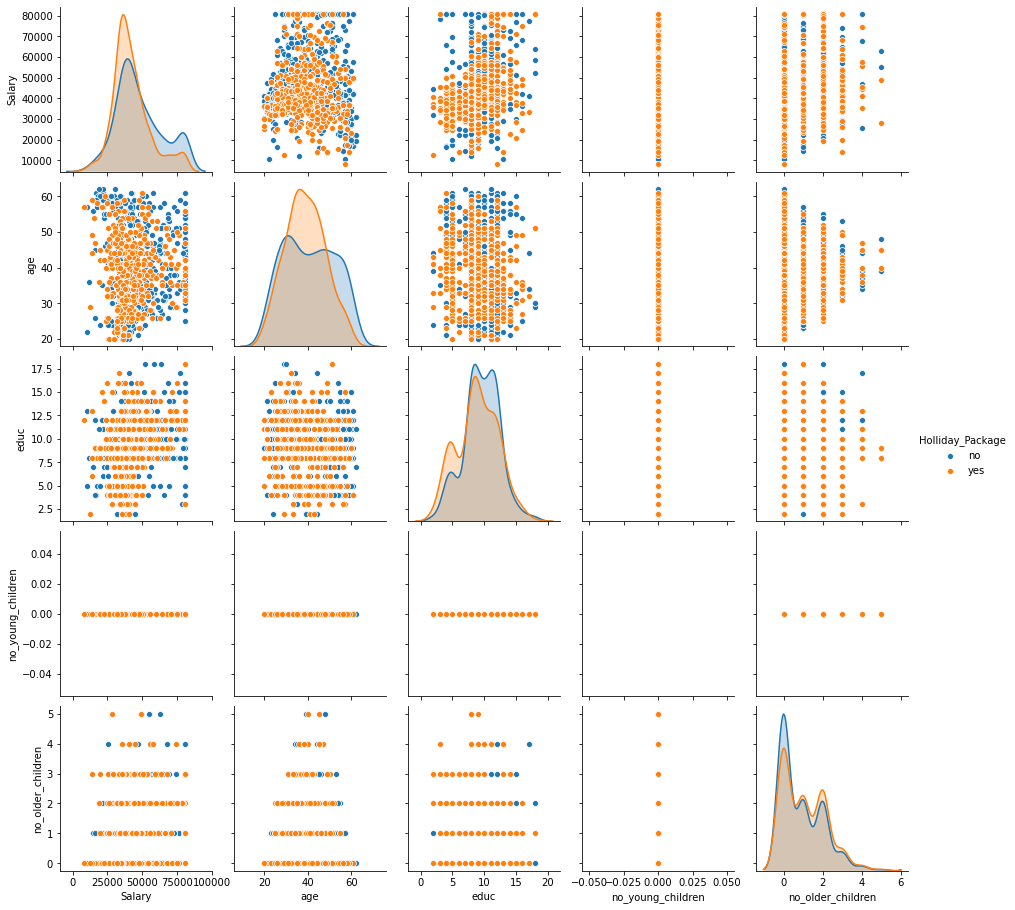

In [377]:
sns.pairplot(df_HP ,diag_kind='kde' ,hue='Holliday_Package');

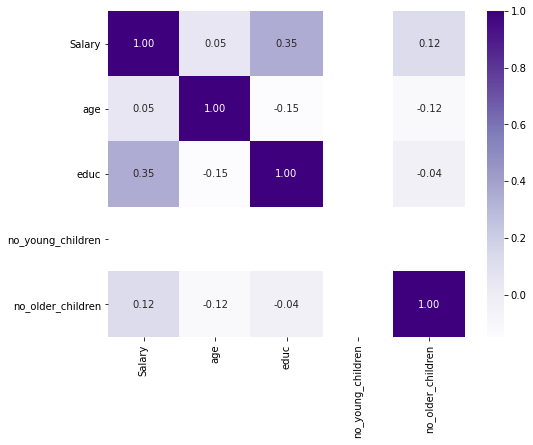

In [378]:
df_HP_cor = df_HP.corr()
plt.figure(figsize=(8,6))
sns.heatmap(df_HP_cor, annot=True, fmt = '.2f', cmap='Purples')


### ENCODING

In [379]:
df_HP1 = df_HP.copy()

In [380]:
df_HP

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412.0,30,8.0,0.0,1.0,no
1,yes,37207.0,45,8.0,0.0,1.0,no
2,no,58022.0,46,9.0,0.0,0.0,no
3,no,66503.0,31,11.0,0.0,0.0,no
4,no,66734.0,44,12.0,0.0,2.0,no
...,...,...,...,...,...,...,...
867,no,40030.0,24,4.0,0.0,1.0,yes
868,yes,32137.0,48,8.0,0.0,0.0,yes
869,no,25178.0,24,6.0,0.0,0.0,yes
870,yes,55958.0,41,10.0,0.0,1.0,yes


In [381]:
df_HP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holliday_Package   872 non-null    object 
 1   Salary             872 non-null    float64
 2   age                872 non-null    int64  
 3   educ               872 non-null    float64
 4   no_young_children  872 non-null    float64
 5   no_older_children  872 non-null    float64
 6   foreign            872 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 47.8+ KB


In [382]:
## Converting the 'Holliday_Package' Variable into numeric by using the LabelEncoder functionality inside sklearn.
from sklearn.preprocessing import LabelEncoder

## Defining a Label Encoder object instance
LE = LabelEncoder()

In [383]:
## Applying the created Label Encoder object for the target class
## Assigning the 0 to no and 1 to yes

df_HP['Holliday_Package'] = LE.fit_transform(df_HP['Holliday_Package'])
df_HP.head()


,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412.0,30,8.0,0.0,1.0,no
1,1,37207.0,45,8.0,0.0,1.0,no
2,0,58022.0,46,9.0,0.0,0.0,no
3,0,66503.0,31,11.0,0.0,0.0,no
4,0,66734.0,44,12.0,0.0,2.0,no


In [384]:
## Applying the created Label Encoder object for the foreign variable
## Assigning the 0 to no and 1 to yes

df_HP['foreign'] = LE.fit_transform(df_HP['foreign'])
df_HP.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412.0,30,8.0,0.0,1.0,0
1,1,37207.0,45,8.0,0.0,1.0,0
2,0,58022.0,46,9.0,0.0,0.0,0
3,0,66503.0,31,11.0,0.0,0.0,0
4,0,66734.0,44,12.0,0.0,2.0,0


In [385]:
df_HP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holliday_Package   872 non-null    int32  
 1   Salary             872 non-null    float64
 2   age                872 non-null    int64  
 3   educ               872 non-null    float64
 4   no_young_children  872 non-null    float64
 5   no_older_children  872 non-null    float64
 6   foreign            872 non-null    int32  
dtypes: float64(4), int32(2), int64(1)
memory usage: 41.0 KB


##### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [418]:
# Copy all the predictor variables into X dataframe
X = df_HP.drop('Holliday_Package', axis=1)

# Copy target into the y dataframe. 
y = df_HP['Holliday_Package']

In [419]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=df_HP['Holliday_Package'])

In [420]:
y_train.value_counts(1)

0    0.539344
1    0.460656
Name: Holliday_Package, dtype: float64

In [421]:
y_test.value_counts(1)

0    0.541985
1    0.458015
Name: Holliday_Package, dtype: float64

In [422]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.6s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [423]:
#Predicting on Training and Test dataset

ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [424]:
#Getting the Predicted Classes and Probs
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.640769,0.359231
1,0.570167,0.429833
2,0.655265,0.344735
3,0.564377,0.435623
4,0.538828,0.461172


In [425]:
#Model Evaluation
# Accuracy - Training Data
model.score(X_train, y_train)

0.6344262295081967

AUC: 0.661


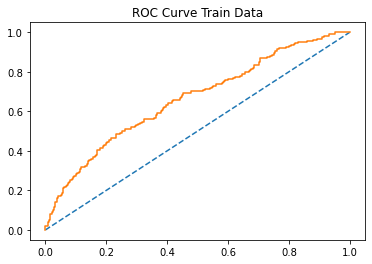

In [426]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.title('ROC Curve Train Data');

In [427]:

# Accuracy - Test Data
model.score(X_test, y_test)

0.6603053435114504

AUC: 0.661


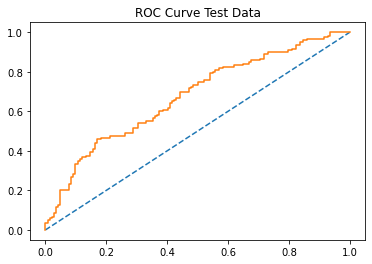

In [430]:
#AUC and ROC for the test data
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.title('ROC Curve Test Data');

In [397]:
#Confusion Matrix for the training data
confusion_matrix(y_train, ytrain_predict)

array([[260,  69],
       [154, 127]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix Train Data - Before Grid Search')

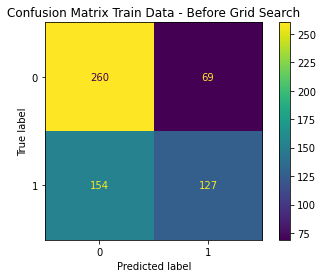

In [398]:
plot_confusion_matrix(model,X_train,y_train);
plt.title('Confusion Matrix Train Data - Before Grid Search')

In [399]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.63      0.79      0.70       329
           1       0.65      0.45      0.53       281

    accuracy                           0.63       610
   macro avg       0.64      0.62      0.62       610
weighted avg       0.64      0.63      0.62       610



Text(0.5, 1.0, 'Confusion Matrix TEST Data - Before Grid Search')

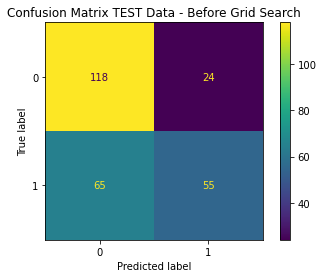

In [404]:
plot_confusion_matrix(model,X_test,y_test);
plt.title('Confusion Matrix TEST Data - Before Grid Search')

In [405]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.64      0.83      0.73       142
           1       0.70      0.46      0.55       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.64       262
weighted avg       0.67      0.66      0.65       262



In [406]:
#Applying GridSearchCV for Logistic Regression
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [407]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [408]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [409]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [410]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='sag')


In [411]:
best_model = grid_search.best_estimator_

In [412]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [413]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.525615,0.474385
1,0.555461,0.444539
2,0.530490,0.469510
3,0.546037,0.453963
4,0.568739,0.431261


              precision    recall  f1-score   support

           0       0.54      1.00      0.70       329
           1       0.00      0.00      0.00       281

    accuracy                           0.54       610
   macro avg       0.27      0.50      0.35       610
weighted avg       0.29      0.54      0.38       610
 



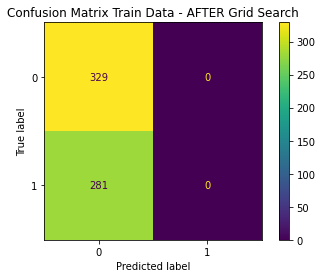

In [414]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
plt.title('Confusion Matrix Train Data - AFTER Grid Search')
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.54      1.00      0.70       142
           1       0.00      0.00      0.00       120

    accuracy                           0.54       262
   macro avg       0.27      0.50      0.35       262
weighted avg       0.29      0.54      0.38       262
 



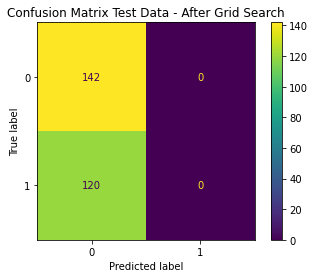

In [416]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
plt.title('Confusion Matrix Test Data - After Grid Search')
print(classification_report(y_test, ytest_predict),'\n');

## LDA MODEL

In [720]:
#Import all necessary modules
import pandas as pd  ###Software library written for the Python programming language for data manipulation and analysis.
import numpy as np ### fundamental package for scientific computing with Python
import os ### using operating system dependent functionality
import scipy.stats as stats
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn import metrics,model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale

In [721]:
df_HP1.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412.0,30,8.0,0.0,1.0,no
1,yes,37207.0,45,8.0,0.0,1.0,no
2,no,58022.0,46,9.0,0.0,0.0,no
3,no,66503.0,31,11.0,0.0,0.0,no
4,no,66734.0,44,12.0,0.0,2.0,no


In [722]:
## Converting the 'Holliday_Package' Variable into numeric by using the LabelEncoder functionality inside sklearn.
from sklearn.preprocessing import LabelEncoder

## Defining a Label Encoder object instance
LE = LabelEncoder()

In [723]:
## Applying the created Label Encoder object for the target class
## Assigning the 0 to no and 1 to yes

df_HP1['Holliday_Package'] = LE.fit_transform(df_HP1['Holliday_Package'])
df_HP1.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412.0,30,8.0,0.0,1.0,no
1,1,37207.0,45,8.0,0.0,1.0,no
2,0,58022.0,46,9.0,0.0,0.0,no
3,0,66503.0,31,11.0,0.0,0.0,no
4,0,66734.0,44,12.0,0.0,2.0,no


In [724]:
## Applying the created Label Encoder object for the foreign variable
## Assigning the 0 to no and 1 to yes

df_HP1['foreign'] = LE.fit_transform(df_HP1['foreign'])
df_HP1.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412.0,30,8.0,0.0,1.0,0
1,1,37207.0,45,8.0,0.0,1.0,0
2,0,58022.0,46,9.0,0.0,0.0,0
3,0,66503.0,31,11.0,0.0,0.0,0
4,0,66734.0,44,12.0,0.0,2.0,0


In [725]:
df_HP1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holliday_Package   872 non-null    int32  
 1   Salary             872 non-null    float64
 2   age                872 non-null    int64  
 3   educ               872 non-null    float64
 4   no_young_children  872 non-null    float64
 5   no_older_children  872 non-null    float64
 6   foreign            872 non-null    int32  
dtypes: float64(4), int32(2), int64(1)
memory usage: 41.0 KB


In [726]:
#Train (70%) - Test (30%) Split
X = df_HP1.drop('Holliday_Package',axis=1)
Y = df_HP1.pop('Holliday_Package')

In [727]:
# Split X and y into training and test set in 70:30 ratio
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.30,random_state=1,stratify = Y)

In [728]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',Y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',Y_test.shape)

Number of rows and columns of the training set for the independent variables: (610, 6)
Number of rows and columns of the training set for the dependent variable: (610,)
Number of rows and columns of the test set for the independent variables: (262, 6)
Number of rows and columns of the test set for the dependent variable: (262,)


In [729]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)

In [730]:
#Prediction
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

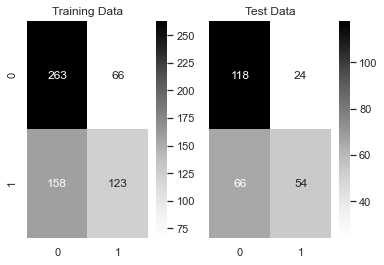

In [731]:
#Training Data and Test Data Confusion Matrix Comparison¶
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [732]:
#Training Data and Test Data Classification Report Comparison
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.62      0.80      0.70       329
           1       0.65      0.44      0.52       281

    accuracy                           0.63       610
   macro avg       0.64      0.62      0.61       610
weighted avg       0.64      0.63      0.62       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.64      0.83      0.72       142
           1       0.69      0.45      0.55       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.63       262
weighted avg       0.66      0.66      0.64       262
 



In [733]:
#Probability prediction for the training and test data¶
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [734]:
pred_prob_train[:,1]

array([0.73614833, 0.64936462, 0.45296681, 0.67842845, 0.66903745,
       0.3774365 , 0.32146187, 0.43700845, 0.3601507 , 0.62535644,
       0.23288822, 0.26149271, 0.44813877, 0.48143931, 0.29614015,
       0.46145671, 0.43653859, 0.30536315, 0.54175682, 0.66481517,
       0.49405489, 0.31531235, 0.75146336, 0.43228357, 0.31741838,
       0.74742033, 0.24732567, 0.7256214 , 0.49778025, 0.4701221 ,
       0.2458476 , 0.59535195, 0.39263888, 0.38905706, 0.34870239,
       0.34966751, 0.47524197, 0.50165433, 0.47132887, 0.20930823,
       0.22990207, 0.67104116, 0.40365647, 0.62197077, 0.64959972,
       0.34741408, 0.34082919, 0.73390632, 0.42023771, 0.62369484,
       0.57834131, 0.3978419 , 0.49066256, 0.40405466, 0.22000295,
       0.41866697, 0.25849518, 0.5276083 , 0.6674488 , 0.40702718,
       0.59934243, 0.26473066, 0.43421298, 0.34478906, 0.5114521 ,
       0.53275226, 0.41995444, 0.49835656, 0.40640466, 0.33834489,
       0.25698034, 0.65937394, 0.48721781, 0.25848244, 0.71797

AUC for the Training Data: 0.661
AUC for the Test Data: 0.675


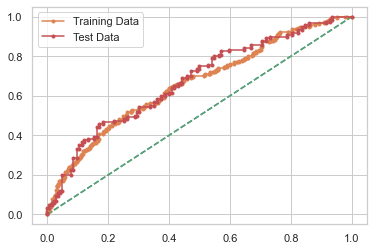

In [735]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()